Características de Sistemas de Primer Orden
=================================
Los sistemas de primer orden son aquellos que pueden describirse mediante una ecuación diferencial de primer orden. Estos sistemas tienen varias características distintivas:
1. **Respuesta Exponencial**: La respuesta de un sistema de primer orden a una entrada escalón es típicamente una función exponencial que se aproxima a un valor final con el tiempo.
2. **Constante de Tiempo (τ)**: La constante de tiempo es un parámetro clave que determina la velocidad de respuesta del sistema. Un valor más pequeño de τ indica una respuesta más rápida.
3. **Estabilidad**: Los sistemas de primer orden son inherentemente estables si la constante de tiempo es positiva.
4. **Función de Transferencia**: La función de transferencia de un sistema de primer orden generalmente tiene la forma $\frac{K}{\tau s + 1}$, donde K es la ganancia del sistema.
5. **Simplicidad**: Los sistemas de primer orden son más simples de analizar y diseñar en comparación con sistemas de orden superior, lo que los hace ideales para aplicaciones básicas de control y modelado.
Estos aspectos hacen que los sistemas de primer orden sean fundamentales en el estudio de la teoría de control y en diversas aplicaciones de ingeniería.

Polos y ceros de la Función de Transferencia
---------------------------------------
En un sistema de primer orden, la función de transferencia típicamente tiene la forma:
$$G(s) = \frac{K}{\tau s + 1}$$
Donde:
- $K$ es la ganancia del sistema.
- $\tau$ es la constante de tiempo del sistema.
El polo de la función de transferencia se encuentra en:
$$s = -\frac{1}{\tau}$$
No hay ceros en un sistema de primer orden típico. La ubicación del polo en el semiplano izquierdo indica que el sistema es estable.


Ejemplo de aplicación: Control de velocidad de un motor DC
----------------------------------------------  
Consideremos un motor de corriente continua (DC) cuya dinámica puede modelarse como un sistema de primer orden. La función de transferencia que relaciona la velocidad angular del motor ($\omega$) con el torque de entrada ($T$) es:
$$G(s) = \frac{\omega(s)}{T(s)} = \frac{1}{Js + B}$$
Donde:
- $J$ es el momento de inercia del rotor.
- $B$ es el coeficiente de fricción viscosa.
Este sistema tiene un polo en:
$$s = -\frac{B}{J}$$
La constante de tiempo del sistema es:
$$\tau = \frac{J}{B}$$
La respuesta del motor a un cambio en el torque de entrada será una función exponencial que se aproxima a la velocidad final con una constante de tiempo $\tau$. Este modelo es útil para diseñar controladores que regulen la velocidad del motor de manera eficiente.


Ejercicio 1. Analizar el sistema de control de velocidad de un motor DC
------------------------------------------------
Caso 1: Suponga que un motor DC tiene un momento de inercia $J = 0.01 \, kg \cdot m^2$ y un coeficiente de fricción viscosa $B = 0.1 \, N \cdot m \cdot s$. Determine la función de transferencia del sistema, la ubicación del polo y la constante de tiempo. Analice la estabilidad del sistema y describa cómo respondería a un cambio en el torque de entrada.



In [1]:
# Escriba las líneas de código para importar las bibliotecas necesarias, numpy, matplotlib, control
# importar solo solve_ivp de scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import control as ct 
from scipy.integrate import solve_ivp

In [11]:
# Función resolve euler
def f_euler(f, tspan, x0, h):
    class Solution:
        pass
    sol = Solution()
    t0, tf = tspan
    N = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, N)
    x = np.zeros((len(x0), N))
    x[:, 0] = x0
    for i in range(1, N):
        x[:, i] = x[:, i-1] + h * f(t[i-1], x[:, i-1])
    sol.t = t
    sol.y = x
    return sol

In [12]:
# Defina la Función con la ecuación diferencial que describe el sistema de primer orden, cuyo parámetros de entrada son x y t
def f(t, x):
    dxdt = -B/J*x + entrada_escalon(t)/J 
    
    return dxdt

def entrada_escalon(t):
    if t >= 0:
        return 1
    else:
        return 0

In [13]:
# Parámetros del sistema CASO 1: Baja inercia y bajo amortiguamiento
J = 0.01  # Inercia
B = 0.1   # Amortiguamiento
# Función de transferencia 
# usar tf de la librería de control
G = ct.tf(1, [J, B])
print(G)
# Polos del sistema
# usar poles --> método del tipo tf
polos =G.poles()
print("Polos del sistema:", polos)
# Valor de Tau
tau = -1/polos[0]
print("Valor de Tau:", tau)

<TransferFunction>: sys[3]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

       1
  ------------
  0.01 s + 0.1
Polos del sistema: [-10.+0.j]
Valor de Tau: (0.1-0j)


In [15]:
# Solución de la ecuación diferencial 
# Tiempo de simulación
# Definir paso de integración y tiempo de simulación.
h = 0.01
tsimu = 0.5
tspan = [0, tsimu]

# Condición inicial
x0 = 0

# Solución de la ecuación diferencial utilizando euler
# usar la función f_euler definida anteriormente
# f_euler(f, tspan, x0, h)  
# donde: f es la función que define la ecuación diferencial, 
#       tspan es el intervalo de tiempo,
#       x0 es la condición inicial 
#       y h es el paso de integración.
# Salida de la función: sol.t (tiempo) y sol.y (respuesta del sistema)
sol_euler = f_euler(f, tspan, [x0], h)


# Solución con solve_ivp
# usar solve_ivp de scipy.integrate
# solve_ivp(f, tspan, x0)
# solve_ivp(f,t_span,x0, method = 'RK45') # RK45 es el método por defecto, RK23, DOP853, Radau, BDF, LSODA
#
sol_slv = solve_ivp(f, tspan, [x0])




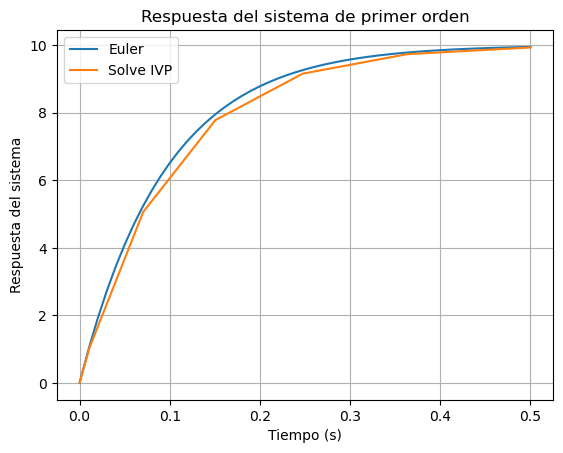

In [16]:
## Gráficas:
plt.plot(sol_euler.t, sol_euler.y[0, :], label='Euler')
plt.plot(sol_slv.t, sol_slv.y[0, :], label='Solve IVP')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta del sistema')
plt.title('Respuesta del sistema de primer orden')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Parámetros del sistema: CASO 2: Alta inercia y bajo amortiguamiento
J = 1.0  # Inercia
B = 0.1   # Amortiguamiento
# Función de transferencia 
# usar tf de la librería de control

# Polos del sistema
# usar poles --> método del tipo tf

# Valor de Tau

In [ ]:
# Solución de la ecuación diferencial 
# Tiempo de simulación
# Definir paso de integración y tiempo de simulación.
h = 
tsimu =
tspan = [0, tsimu]

# Condición inicial
x0 = 0

# Solución de la ecuación diferencial utilizando euler
# usar la función f_euler definida anteriormente
# f_euler(f, tspan, x0, h)  
# donde: f es la función que define la ecuación diferencial, 
#       tspan es el intervalo de tiempo,
#       x0 es la condición inicial 
#       y h es el paso de integración.
# Salida de la función: sol.t (tiempo) y sol.y (respuesta del sistema)



# Solución con solve_ivp
# usar solve_ivp de scipy.integrate
# solve_ivp(f, tspan, x0)
# solve_ivp(f,t_span,x0, method = 'RK45') # RK45 es el método por defecto, RK23, DOP853, Radau, BDF, LSODA
#




In [ ]:
## Gráficas:

Sintonización de la Ganacia
---------------------------------------
La sintonización de la ganancia en un sistema de primer orden implica ajustar el valor de $K$ en la función de transferencia:
$$G(s) = \frac{K}{\tau s + 1}$$
Aumentar la ganancia $K$ generalmente mejora la rapidez de la respuesta del sistema, pero también puede llevar a una mayor oscilación o incluso inestabilidad si no se maneja adecuadamente. La sintonización adecuada de la ganancia es crucial para lograr un equilibrio entre la velocidad de respuesta y la estabilidad del sistema.

Lugar de las raíces
---------------------------------------
El lugar de las raíces es una herramienta gráfica utilizada para analizar cómo varían los polos de un sistema de control en función de la ganancia $K$. En un sistema de primer orden, el polo se mueve a lo largo del eje real negativo a medida que se ajusta la ganancia. Esto permite a los ingenieros visualizar cómo los cambios en la ganancia afectan la estabilidad y el rendimiento del sistema.
En Python, se puede utilizar la librería `control` para trazar el lugar de las raíces de un sistema de primer orden. Aquí hay un ejemplo de cómo hacerlo:

```python
import control as ct
import matplotlib.pyplot as plt

# Parámetros del sistema
K = 1.0  # Ganancia
tau = 0.1  # Constante de tiempo

# Función de transferencia
G = ct.tf([K], [tau, 1])

# Lugar de las raíces
rlist = ct.root_locus(G, Plot=True)

In [ ]:
# Parámetros del sistema
import control as ct
import numpy as np
import matplotlib.pyplot as plt


# Lugar de las raíces
respuesta = ct.root_locus_map(G) # G es la función de transferencia de lazo abierto
plt.figure()
respuesta.plot()

# Tabla de valores de ganancia y raíces
import pandas as pd
tabla = pd.DataFrame({
    'Ganancia K': respuesta.gains,
    'Raíces': [list(raices) for raices in respuesta.loci]
})
print(tabla)


In [ ]:
# Respuesta al escalón de lazo cerrado con diferentes ganancias
# step_response

K = [0.5,1,10,100]  # Ganancia
plt.figure()
for k in K:
    T = ct.feedback(k*G, 1) # Lazo cerrado
    t, y = ct.step_response(T)
    plt.plot(t, y, label=f'K={k}')
plt.title('Respuesta al escalón de lazo cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

In [ ]:
# Respuesta al impulso
# impulse_response
K = [0.5,1,10,100]  # Ganancia
plt.figure()
for k in K:
    T = ct.feedback(k*G, 1)
    t, y = ct.impulse_response(T)
    plt.plot(t, y, label=f'K={k}')
plt.title('Respuesta al impulso de lazo cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

In [ ]:
# respuesta a la rampa
K = [0.5,1,10,100]  # Ganancia
t = np.linspace(0,0.5,500)
rampa = t  # Señal de rampa
plt.figure()
for k in K:
    T = ct.feedback(k*G, 1)
    t, y = ct.forced_response(T, t, rampa)
    plt.plot(t, y, label=f'K={k}')
plt.title('Respuesta a la rampa de lazo cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

Características de la Respuesta en el Tiempo
---------------------------------------
La respuesta en el tiempo de un sistema de primer orden a una entrada escalón se caracteriza por:
1. **Tiempo de establecimiento**: El tiempo que tarda la respuesta en alcanzar y permanecer dentro de un cierto porcentaje del valor final (usualmente 2% o 5%).
2. **Sobrepaso**: En sistemas de primer orden, el sobrepaso es generalmente cero, ya que la respuesta no oscila.
3. **Velocidad de respuesta**: Determinada por la constante de tiempo $\tau$, donde un valor más pequeño de $\tau$ indica una respuesta más rápida.
4. **Valor final**: La respuesta se aproxima al valor final determinado generalmente por la ganancia $K$.
Estos aspectos son fundamentales para evaluar el rendimiento de un sistema de primer orden en aplicaciones prácticas.


In [ ]:
# step_info
info = ct.step_info(T)
print("Información de la respuesta al escalón:")
for key, value in info.items():
    print(f"  {key}: {value}")#

Características de la respuesta estacionaria
---------------------------------------
La respuesta estacionaria de un sistema de primer orden se refiere al comportamiento del sistema una vez que ha alcanzado un estado estable después de una perturbación o entrada. Las características clave de la respuesta estacionaria incluyen:
1. **Valor final**: En un sistema de primer orden, el valor final de la respuesta a una entrada escalón es igual a la ganancia del sistema $K$.
2. **Error en estado estacionario**: Para una entrada escalón, el error en estado estacionario es cero, ya que el sistema alcanza el valor final sin desviaciones.
* **Constante de error estática de posición**
$$
    K_p = \lim_{s \to 0} G(s)
$$
Y el error en estado estacionario para una entrada escalón es:
$$
    e_{ss} = \frac{1}{1 + K_p}
$$
    
* **Constante de estática de velocidad**
$$
    K_v = \lim_{s \to 0} sG(s)
$$
Y el error en estado estacionario para una entrada rampa es:
$$
    e_{ss} = \frac{1}{K_v}
$$

* **Constante de estática de aceleración**
$$
    K_a = \lim_{s \to 0} s^2G(s)
$$
Y el error en estado estacionario para una entrada parabólica es:
$$
    e_{ss} = \frac{1}{K_a}
$$
**Recuerde, que estas características aplican específicamente para sistemas con retroalimentación unitaria.**

In [ ]:
# Uso del la librería de simbólico para resolver constantes de error estático
from sympy import symbols, limit, simplify
# Definir la función de transferencia simbólica

# Calcular las constantes de error estático:
K_p = 
K_v = 
K_a = 